# Multiple Linear Correlation

In [2]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
#India Multilinear correlation plot with correct labels
#Mount Google Drive please configure your file paths to match mine
drive.mount('/content/gdrive', force_remount=True)


dependent_variable_path = '/content/gdrive/My Drive/contents/plastic_india.xlsx'
independent_variable1_path = '/content/gdrive/My Drive/contents/population_india.xlsx'
independent_variable2_path = '/content/gdrive/My Drive/contents/trade_india.xlsx'



Mounted at /content/gdrive


In [3]:
dependent_variable = pd.read_excel(dependent_variable_path)
independent_variable1 = pd.read_excel(independent_variable1_path)
independent_variable2 = pd.read_excel(independent_variable2_path)


Y = dependent_variable[['Weight (kg)']] #Extract dependent variable (Y) from the dependent dataset


X1 = independent_variable1[['Value']] #Extract independent variables (X) from the independent datasets
X2 = independent_variable2[['Net Trade']]

#Concatenate the IVs
X = pd.concat([X1, X2], axis=1).dropna()


X = sm.add_constant(X) #Add a constant term for the intercept


In [4]:
#Interpolate missing values
Y_interpolated = Y.interpolate()
X_interpolated = X.interpolate()


min_rows = min(Y_interpolated.shape[0], X_interpolated.shape[0]) #Make sure both DataFrames have the same number of rows

Y_equalized = Y_interpolated.iloc[:min_rows].reset_index(drop=True)
X_equalized = X_interpolated.iloc[:min_rows].reset_index(drop=True)

#Check for missing values
print("Missing values in Y_equalized:", Y_equalized.isnull().sum())
print("Missing values in X_equalized:", X_equalized.isnull().sum())

#Handle missing values
data = pd.concat([Y_equalized, X_equalized], axis=1).dropna()
Y_equalized = data[['Weight (kg)']]
X_equalized = data[['const', 'Value', 'Net Trade']]


model = sm.OLS(Y_equalized, X_equalized).fit()


Missing values in Y_equalized: Weight (kg)    1
dtype: int64
Missing values in X_equalized: const        0
Value        0
Net Trade    0
dtype: int64


                            OLS Regression Results                            
Dep. Variable:            Weight (kg)   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     7.902
Date:                Tue, 26 Nov 2024   Prob (F-statistic):            0.00182
Time:                        15:19:46   Log-Likelihood:                -568.33
No. Observations:                  32   AIC:                             1143.
Df Residuals:                      29   BIC:                             1147.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.855e+07    1.7e+07      4.041      0.0

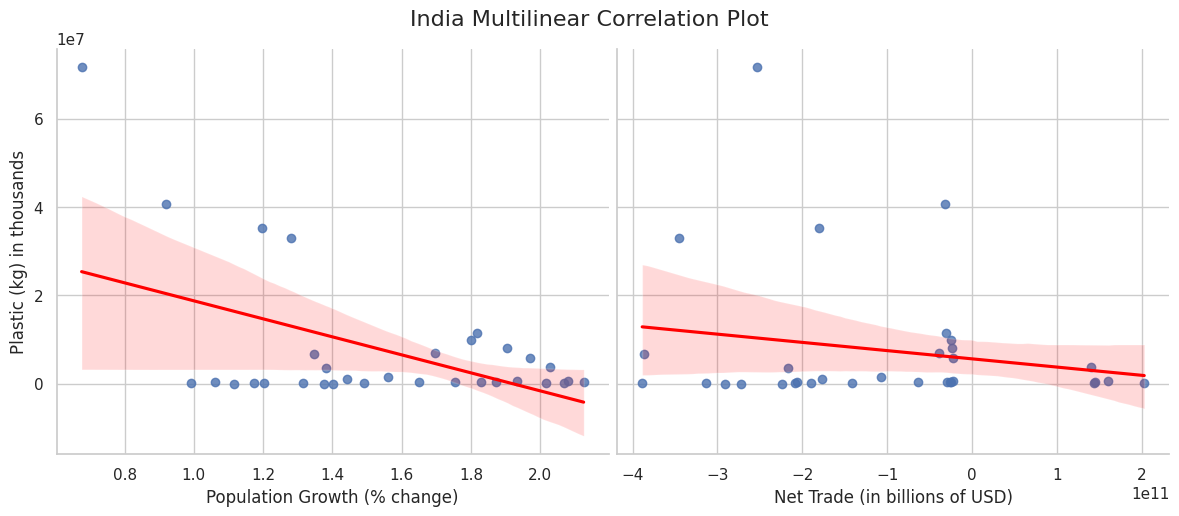

In [5]:
print(model.summary())

#Plot multilinear correlation plot with custom axis labels
custom_x_label = 'Population Growth (% change)'
custom_y_label = 'Plastic (kg) in thousands'
net_trade_label = 'Net Trade (in billions of USD)'

sns.set(style='whitegrid')
pairplot = sns.pairplot(data, x_vars=['Value', 'Net Trade'], y_vars='Weight (kg)', kind='reg',
                        height=5, aspect=1.2, plot_kws={'line_kws': {'color': 'red'}})

#Set custom axis labels individually
pairplot.axes[0, 0].set_xlabel(custom_x_label)
pairplot.axes[0, 0].set_ylabel(custom_y_label)
pairplot.axes[0, 1].set_xlabel(net_trade_label)


pairplot.fig.suptitle('India Multilinear Correlation Plot', y=1.02, fontsize=16)

plt.show()
